In [ ]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt

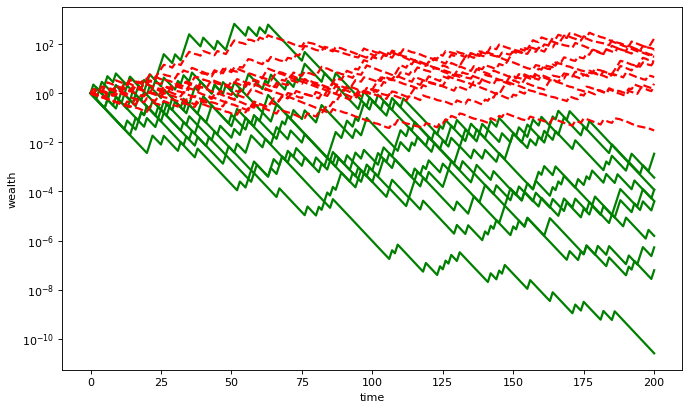

In [ ]:
P = np.array(np.mat(
    '3.5000    1.1100    1.1100    1.0400    1.0100;\
     0.5000    0.9700    0.9800    1.0500    1.0100;\
     0.5000    0.9900    0.9900    0.9900    1.0100;\
     0.5000    1.0500    1.0600    0.9900    1.0100;\
     0.5000    1.1600    0.9900    1.0700    1.0100;\
     0.5000    0.9900    0.9900    1.0600    1.0100;\
     0.5000    0.9200    1.0800    0.9900    1.0100;\
     0.5000    1.1300    1.1000    0.9900    1.0100;\
     0.5000    0.9300    0.9500    1.0400    1.0100;\
     3.5000    0.9900    0.9700    0.9800    1.0100'))

m=P.shape[0];
n=P.shape[1];
x_unif = np.ones(n)/n; # uniform resource allocation

#################################################################
pi = 1/m
x_opt = cvx.Variable(n)
p = np.array([P[i + 1] / P[i] for i in range(0, m - 1)])
obj = cvx.sum([cvx.log(cp.scalar_product(x_opt, p[i])) for i in range(len(p))])

problem = cvx.Problem(cvx.Maximize(obj), [cvx.sum(x_opt) == 1, x_opt >= np.zeros(n)])
problem.solve(verbose=False, solver=cvx.SCS)

#################################################################

np.random.seed(10);
N = 10;  # number of random trajectories 
T = 200; # time horizon
w_opt = np.zeros((N,T+1))
w_unif = np.zeros((N,T+1))
for i in range(N):
	events = np.floor(np.random.rand(T)*m)
	events = events.astype(int)    
	P_event = P[events,:]
	w_opt[i,:] = np.append(1, np.cumprod(P_event.dot(x_opt.value)))
	w_unif[i,:] = np.append(1, np.cumprod(P_event.dot(x_unif)))

plt.figure(figsize=(10, 6), dpi=80)
plt.xlabel('time')
plt.ylabel('wealth')
plt.gca().set_yscale('log')
plt.plot(range(T+1), np.transpose(w_opt), color="green", linewidth=2.0)
plt.plot(range(T+1), np.transpose(w_unif), color="red", linewidth=2.0, linestyle='--')
plt.show()